# Hotel Customer Segmentation

#### Group Alias: Euclidean Consultancy Group
#### Members:
- Ernesto Aguilar	  (m20190559) 
- Filipa Cerqueira    (r2016677)
- Laura Castro	      (m20190269)
- Norayr Meliksetyan  (m20190687)

### Problem description

The Hotel chain C has provided to this consultancy group a dataset with 111.733 customers bookings records aiming to deliver to the marketing manager a robust customer segmentation based on the available features of the mentioned dataset. During previous years, the customer segmentation used by this Hotel chain was based only in sales origin, but not in demographics or behavioral characteristic. 

The actual Business Case aims to change the customer segmentation of the Hotel chain C, provide new strategy paths to for the marketing department, and with those strategies, increase the revenues by taking advantage of the customers preferences. 
The main advantage of applying Hotel Customer Segmentation is to know the specificity of each customer group. The more specific the market segmentation, the easier it is to allocate investments and strategies to find the correct customers to generate higher revenues.  Nevertheless, most of the cases customers hide motivations of purchase behaviour and satisfaction, therefore exploring available data and performing Customer Segmentation Modelling is so valuable.


### Dataset description

##### Customers information
- **ID**: Customer ID
- **Nationality**: Nationality of the customer in ISO 3166-1 (Alpha 3) format
- **Age**: Age of the customer
- **DaysSinceCreation**: Number of elapsed days since the customer was created
- **NameHash**: Hash of the customer name
- **DocIDHash**: Hash of the customer personal document identification number (usually passport or ID card)
- **AverageLeadTime**: Average number of days before arrival date the customer makes bookings

- **LodgingRevenue**: Total amount of lodging revenue paid by the customer so far
- **OtherRevenue**: Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far

##### Booking information
- **BookingsCanceled**: Number of bookings the customer made but subsequently canceled
- **BookingsNoShowed**: Number of bookings the customer made but subsequently made a "no-show"
- **BookingsCheckedin**: Number of bookings the customer made, which actually ended up staying

- **PersonNights**: Total person/nights the customer has stayed at the hotel so far. Persons/Nights are the sum of Adults and Children in each booking, multiplied by the number of Nights (Length-of-stay) of the booking 
- **RoomNights**: Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of rooms of each booking by the the number of Nights (Length-of-stay) of the booking
- **DistributionChannel**: Distribution channel normally used by the customer to make bookings at the hotel
- **MarketSegment**: Current market segment of the customer 
- **SRHighFloor**: Indication if the customer usually asks for a room in a higher floor (0: No, 1: Yes)

- **SRLowFloor**: Indication if the customer usually asks for a room in a lower floor (0: No, 1: Yes)
- **SRAccessibleRoom**: Indication if the customer usually asks for an accessible room (0: No, 1: Yes)
- **SRMediumFloor**: Indication if the customer usually asks for a room in a middle floor (0: No, 1: Yes)
- **SRBathtub**: Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes)
- **SRShower**: Indication if the customer usually asks for a room with a shower (0: No, 1: Yes)
- **SRCrib**: Indication if the customer usually asks for a crib (0: No, 1: Yes)

- **SRKingSizeBed**: Indication if the customer usually asks for a room with a king size bed (0: No, 1: Yes)
- **SRTwinBed**: Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes)
- **SRNearElevator**: Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes)
- **SRAwayFromElevator**: Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes)
- **SRNoAlcoholInMiniBar**: Indication if the customer usually asks for a room with no alcohol in the mini bar (0: No, 1: Yes)
- **SRQuietRoom**: Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes) <br>
NOTE: All time-based columns (e.g., Age or DaysSinceCreation) were calculated at the dataset extraction date.

# Notebook logical sequence:

### 1. Data understanding
1.1 Load data <br>
1.2 Print data types <br>
1.3 Show top rows <br>
1.4 Display features names <br>
1.5 Display summary statistics for all features <br>
1.6 Plot histograms <br>
1.7 Display boxplots <br>

### 2. Coherence / Discrepancy Verification (Data cleaning)
2.1 Identify and drop duplicated records <br>
2.2 Count and visualize missing values <br>
2.3 Logical validation of each feature <br>
2.4 Exclude and create a dataframe for each type of misvalidation <br>

### 3. Feature engineering
3.1 Create new calculated features <br>
3.2 Import external data source to complement the analysis <br>
3.3 Input space reduction (support with correlation matrix) <br>

### 4. Outliers detection and treatment
4.1 Plotting boxplots (IQR for detection) <br>
4.2 Excluding outliers (since K-means is sensitive to outliers) <br>

### 5. Data visualization 
5.1 Combine features on different plots to find more insights about the business <br>

### 6. PCA for reducing dimensionality
6.1 Normalize data before PCA
6.2 Apply Principal Component Analysis (PCA) for reducing dimensionality
6.3 Demonstrate that selected principal components explains at least 80%-90% of the total variance <br>

### 7. Clustering with K-means
7.1 Apply elbow method and silhoutte analysis to determine the correct number of clusters <br>
7.2 Apply K-means for clustering customers<br>
7.3 Plot 2 or 3 first principal components to visualize clustering <br>
7.4 Create a dataframe with the weights per component <br>
7.5 Study the weights of each component over each cluster <br>
7.6 Interpret each clustering results (customer segmentation) <br>

### Initial setup and modules/packages loading

In [1]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import collections
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm

### Functions

In [2]:
# Formatting negative values into red, else black
def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

def mode(obj):
    """
    This function calculates the mode of a list of values.
    """
    mod = obj.value_counts().index[0]
    return(mod)


def insert_deleted(data, label):
    """
    Adds data with a proper label to data_deleted dataframe
    """
    data.loc[:,'label']=label
    df=data_deleted.append(data, ignore_index=True).copy()
    return(df)

# Compare two lists and return non matching elements
def setdiff_sorted(array1,array2,assume_unique=False):
    ans = np.setdiff1d(array1,array2,assume_unique).tolist()
    if assume_unique:
        return sorted(ans)
    return ans

# Elbow plot to find the optimal number of clusters
def sse_vals(data,max_k):
    """
    This function returns a dataframe of sse values for differnt k. 
    data: original data DataFrame
    max_k: integer representing the max of the range of values of k from [2,k]
    """
    cluster_range = range(2,max_k)
    sse = {}
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, 
                    random_state=123,
                    n_init = 10,
                    max_iter = 300).fit(data)
        data["Clusters"] = kmeans.labels_
        sse[k] = kmeans.inertia_
        # Inertia: Sum of distances of samples to their closest cluster center
    clusters_df = pd.DataFrame.from_dict(sse,orient='index',columns=['Inertia'])
    return(clusters_df)

# Average silhouette score to find the optimal number of clusters
def sill_scores(X, max_k):
    """
    This function returns a dataframe of silhouette scor values for differnt k. 
    data: original data DataFrame
    max_k: integer representing the max of the range of values of k from [2,k]
    """
    range_n_clusters = list(range(2,max_k))
    sil_scores=[]
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters, random_state=123, n_init=10, max_iter=300)
        cluster_labels = clusterer.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        sil_scores.append(silhouette_avg)
    sil_sc=pd.DataFrame({'k': range_n_clusters, 'sil_score':sil_scores})
    return(sil_sc)

    
#define function to create dummies for given column and remove it from df
def create_dummies(df,col_name):
    """
    This function returns a Dataframe with dummy variable columns. 
    df: The original data DataFrame.
    col_name: a string with the column name corresponding to the categorical column you would like to one hot encode.
    """
    
    #turn column into dummies    
    enc = pd.get_dummies( df[col_name])
    
    #join dummies at the end of df    
    df = pd.concat([df, enc], axis=1)
    
    #drop original column from df    
    #df.drop(col_name,axis=1,inplace=True)
    
    return df

def corr_plot(corr):
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=np.bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(20,20))

    # Generate a custom diverging colormap
    cmap = 'coolwarm'

    # Draw the heatmap with the mask and correct aspect ratio
    ax=sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version #should not be here - bug
    ax.set_ylim(bottom + 0.5, top - 0.5) ## should not be here - bug
    
def plot_cluster(clust):
    """ Plots the clusters variables comparing to population mean. (normalized data)"""
    plt.figure(figsize=(100, 40))
    plt.plot(clusters_minmax.iloc[clust,:], 'bo', markersize=60, color='c', label='Cluster '+str(clust))
    plt.plot(data_avg.iloc[0,:], 'bo', markersize=60, color='k', label='Data Average')
    plt.legend(fontsize=60)
    plt.xticks(fontsize=60)
    plt.yticks(fontsize=60)
    plt.ylim((-1.2,1.2))

### 1. Data understanding

In [3]:
# Importing the dataset (define a path on 'p' variable if the Dataset.csv file is in a different folder)
p=''
data = pd.read_csv(p+'Dataset.csv', sep=';')

In [4]:
# Show data type for each variable
data.dtypes

ID                        int64
Nationality              object
Age                     float64
DaysSinceCreation         int64
NameHash                 object
DocIDHash                object
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
BookingsCheckedIn         int64
PersonsNights             int64
RoomNights                int64
DistributionChannel      object
MarketSegment            object
SRHighFloor               int64
SRLowFloor                int64
SRAccessibleRoom          int64
SRMediumFloor             int64
SRBathtub                 int64
SRShower                  int64
SRCrib                    int64
SRKingSizeBed             int64
SRTwinBed                 int64
SRNearElevator            int64
SRAwayFromElevator        int64
SRNoAlcoholInMiniBar      int64
SRQuietRoom               int64
dtype: object

In [5]:
# Display top 5 rows
data.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Show columns names for future references
data.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'],
      dtype='object')

In [7]:
# Summary statistics for all variables
summary = data.describe(include='all')
summary = summary.transpose()
summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,111733,NaN,NaN,NaN,55867,32254.7,1,27934,55867,83800,111733
Nationality,111733,199,FRA,16516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,107561,NaN,NaN,NaN,45.6392,17.245,-10,33,47,58,123
DaysSinceCreation,111733,NaN,NaN,NaN,595.027,374.657,36,288,522,889,1385
NameHash,111733,107584,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DocIDHash,110732,103480,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,3032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageLeadTime,111733,NaN,NaN,NaN,60.8331,85.1153,-1,0,21,95,588
LodgingRevenue,111733,NaN,NaN,NaN,283.851,379.132,0,0,208,393.3,21781
OtherRevenue,111733,NaN,NaN,NaN,64.6828,123.581,0,0,31,84,8859.25
BookingsCanceled,111733,NaN,NaN,NaN,0.00228223,0.0806315,0,0,0,0,15


In [8]:
# Define a list for all numerical variables, exlcuding ID column
numerical = ['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
           'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn','PersonsNights', 'RoomNights',
           'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
           'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
           'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']

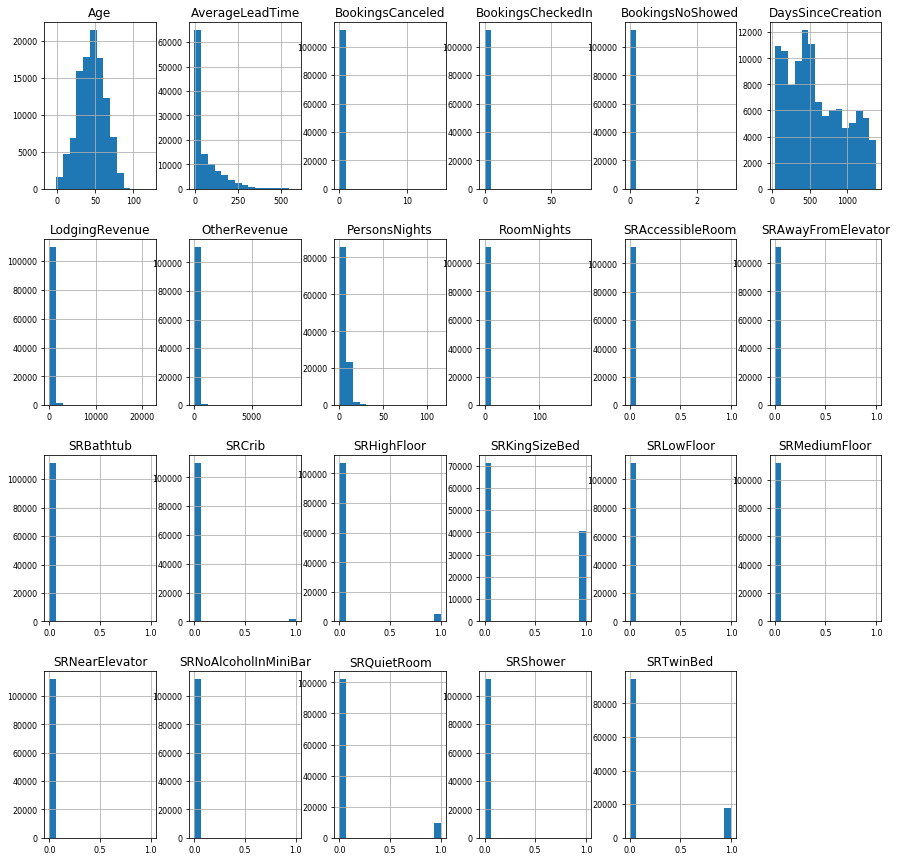

In [9]:
# Do histograms on all numeric variables to have a general view of the data
data[numerical].hist(bins=15, figsize=(15, 15), layout=(4, 6), xlabelsize=8, ylabelsize=8);

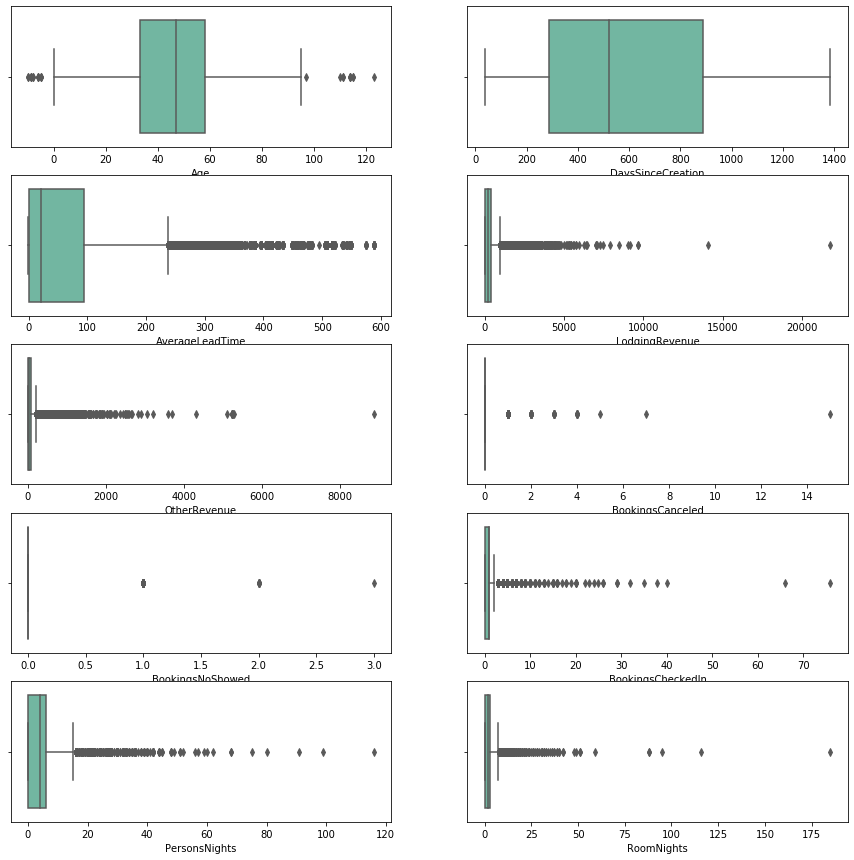

In [10]:
# Plotting box-plot with the default IQR = 1.5 to have a quick view of possible outliers
boxp_var = ['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
           'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn','PersonsNights', 'RoomNights',]

fig, ax = plt.subplots(5, 2, figsize=(15, 15))
for var, subplot in zip(data[boxp_var], ax.flatten()):
    sns.boxplot(data[var], ax=subplot, orient="h", palette="Set2")
    
del boxp_var

The **Age** variable seems to have miscalculated values, since some values are under 18 and other values are too large (more than 80), which is not normal. 

### 2. Coherence / Discrepancy Verification (Data cleaning)

In [11]:
# Drop duclicated records, since there should not be two identical customers
original_lenght = len(data)
data.drop_duplicates(inplace=True)
new_lenght = len(data)
print('There duplicated records percentage is:', round((1-new_lenght / original_lenght) * 100, 2), "%")

There duplicated records percentage is: 0.0 %


In [12]:
# Show the number of NULL values per variable
d = {'Nulls': data.isnull().sum(), 
     'Percentage (%)': (data.isnull().sum()/len(data))*100}
df = pd.DataFrame(data=d)
del d
df['Nulls'] = df['Nulls'].apply('{:,.0f}'.format)
df['Percentage (%)'] = df['Percentage (%)'].apply('{:.2f}%'.format)
df

,Nulls,Percentage (%)
ID,0,0.00%
Nationality,0,0.00%
Age,"4,172",3.73%
DaysSinceCreation,0,0.00%
NameHash,0,0.00%
DocIDHash,"1,001",0.90%
AverageLeadTime,0,0.00%
LodgingRevenue,0,0.00%
OtherRevenue,0,0.00%
BookingsCanceled,0,0.00%


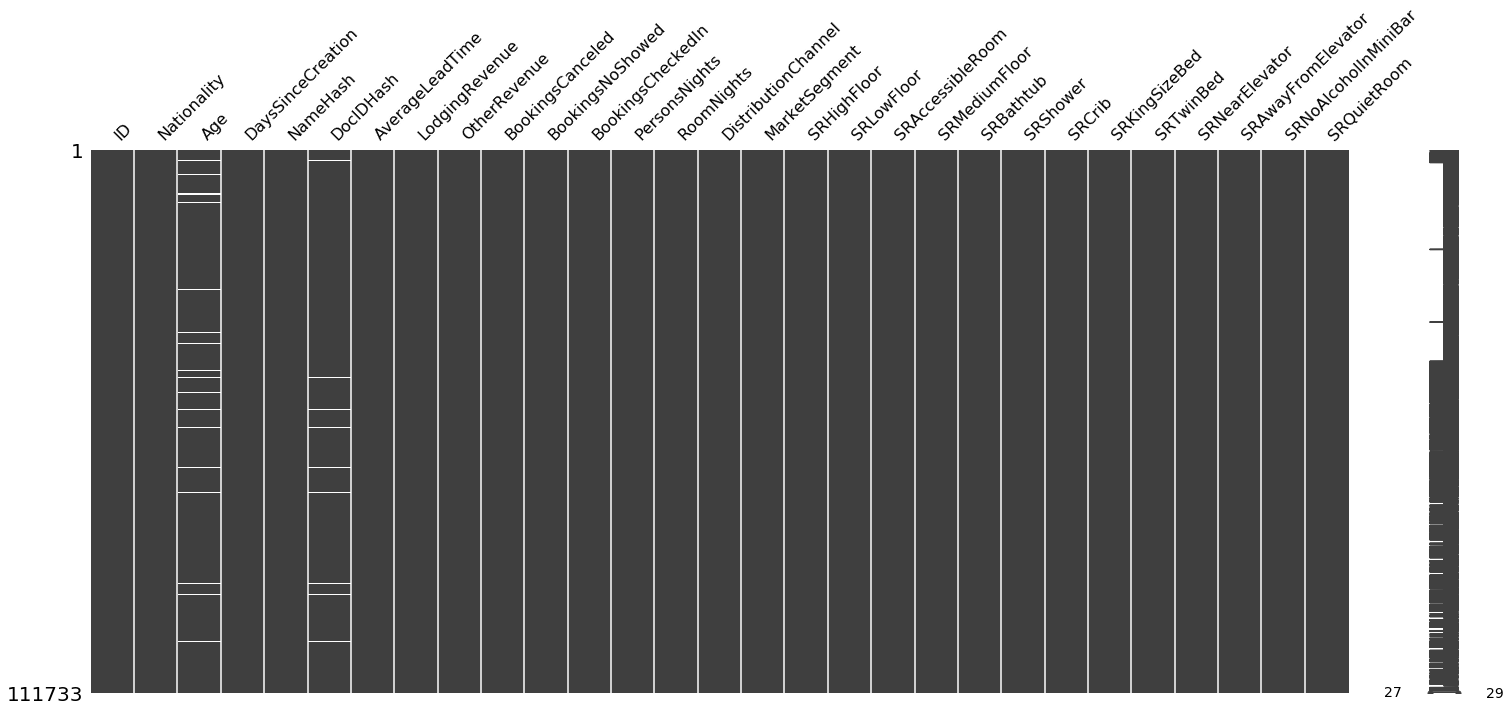

In [13]:
# Visualize missing values as a matrix 
msno.matrix(data)

There are some nulls in Age and DocIDHash.
The nulls in age reprsent only 3%, lets see the correlation to see if these variable is correlated with other, 
because if it is, simple imputations as median will take us to bigger errors... so a solution would be the knn comparing
with neightbors that are alike

In [14]:
# A) Validate that ID column has a unique value for each record
data['ID'].is_unique

True

In [15]:
# B) Validate Nationality features by comparing if each value matches with the ISO 3 digits code

# First, it's necessary to import ISO codes
ISO_df = pd.read_csv('all.csv') # C:\\Users\\laura\\OneDrive\\Documentos\\MAA\\Budiness cases\\BC1\\
ISO_df.drop(['name', 'alpha-2', 'country-code', 'iso_3166-2', 'region',
             'sub-region', 'intermediate-region', 'region-code', 'sub-region-code',
             'intermediate-region-code'], axis=1, inplace=True)
ISO_df.rename(columns={'alpha-3': 'ISO codes'}, inplace=True)

print('The non matching from Nationality columns are:', setdiff_sorted(data['Nationality'], ISO_df['ISO codes']))

The non matching from Nationality columns are: []


**Age** make sure all of our clients have a "possible" age
We already did a summary statistics where we realized we had negative values for age, as well as someone 123 years old. For this reason we're going to restrict our clients age to 18 until 90. <br> <br>
Calculating and showing the impact of excluding records with wierd ages.

In [16]:
# C) Validate age values

# Calculating total Revenue:
Total_revenue = data['LodgingRevenue'].sum() + data['OtherRevenue'].sum()

# Calculating variables to know the exact size of wrong age data:
Null_age_cust = data['Age'].isnull().sum()
Null_age_rev = data['LodgingRevenue'][data['Age'].isnull()].sum() + data['OtherRevenue'][data['Age'].isnull()].sum()
Null_age_rev_pct = (Null_age_rev/Total_revenue)*100

Neg_age_cust = data['Age'][data['Age'] < 0].count()
Neg_age_rev = data['LodgingRevenue'][data['Age'] < 0].sum() + data['OtherRevenue'][data['Age'] < 0].sum()
Neg_age_rev_pct = (Neg_age_rev/Total_revenue)*100

Und_age_cust = data['Age'][data['Age'] < 18].count() - Neg_age_cust
Und_age_rev = round(data['LodgingRevenue'][data['Age'] < 18].sum() + data['OtherRevenue'][data['Age'] < 0].sum() - Neg_age_rev,2)
Und_age_rev_pct = (Und_age_rev/Total_revenue)*100

Old_age_cust = data['Age'][data['Age'] > 100].count()
Old_age_rev = data['LodgingRevenue'][data['Age'] > 100].sum() + data['OtherRevenue'][data['Age'] > 100].sum()
Old_age_rev_pct = (Old_age_rev/Total_revenue)*100

# Calculating size of customers with negative age:
print('The count of customers with NULL age is: ', Null_age_cust, '\n   ',
      'which are ', round(Null_age_cust/len(data),4)*100,'% of the customers,', '\n   ',
      'and represents revenues of EUR', '{:,}'.format(Null_age_rev), 
      '(', round((Null_age_rev_pct),4), '% of all revenues )')

# Calculating size of customers with negative age:
print('The count of customers with negative age is: ', Neg_age_cust, '\n   ',
      'which are ', round(Neg_age_cust/len(data),4)*100,'% of the customers,', '\n   ',
      'and represents revenues of EUR', '{:,}'.format(Neg_age_rev), 
      '(', round((Neg_age_rev_pct),4), '% of all revenues )')

# Count the number of customers with positive age but under 18:
print('The count of customers with positive, but under 18 years old is: ', Und_age_cust, '\n   ',
      'which are ', round(Und_age_cust/len(data),4)*100,'% of the customers,', '\n   ',
      'and represents revenues of EUR', '{:,}'.format(Und_age_rev), 
      '(', round((Und_age_rev_pct),4), '% of all revenues )')

# Count the number of customers with age above 100:
print('The count of customers with more than 100 years old is: ', Old_age_cust, '\n   ',
      'which are ', round(Old_age_cust/len(data),4)*100,'% of the customers,', '\n   ',
      'and represents revenues of EUR', '{:,}'.format(Old_age_rev), 
      '(', round((Old_age_rev_pct),4), '% of all revenues )')

del Total_revenue

The count of customers with NULL age is:  4172 
    which are  3.73 % of the customers, 
    and represents revenues of EUR 1,126,686.54 ( 2.8932 % of all revenues )
The count of customers with negative age is:  14 
    which are  0.01 % of the customers, 
    and represents revenues of EUR 4,195.98 ( 0.0108 % of all revenues )
The count of customers with positive, but under 18 years old is:  6879 
    which are  6.16 % of the customers, 
    and represents revenues of EUR 699,600.48 ( 1.7965 % of all revenues )
The count of customers with more than 100 years old is:  9 
    which are  0.01 % of the customers, 
    and represents revenues of EUR 1,817.2 ( 0.0047 % of all revenues )


In [17]:
# Creating a dataframe to save deleted records
data_deleted = pd.DataFrame(columns = ['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom', 'label'])

In [18]:
# Excluding NULL age into a new dataframe:
data_deleted = insert_deleted(data[data['Age'].isnull()], 'NULL')

# Excluding under 18 into a new dataframe:
data_deleted = insert_deleted(data[data['Age'] < 18 ], 'u_18')

# Excluding above 100 into a new dataframe:
data_deleted = insert_deleted(data[data['Age'] < 100 ], 'a_100')

C:\Users\e17ag\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\e17ag\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [19]:
# Variable Age does not has a significant correlation with other variables to try to impute NULL values on Age 
data.dropna(subset=['Age'], inplace=True)

# The nulls in DocIDHash also deasapeared
data.isnull().sum()

ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
NameHash                0
DocIDHash               0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

In [20]:
# Dropping misvalidated Ages (under 18 and above 100 years old)
data = data.loc[data['Age'] >= 18]
data = data.loc[data['Age'] <= 100]
data.reset_index(drop=True, inplace=True)

In [21]:
# D) Counting all the duplicated values on columns "NameHash", "DocIDHash"
data[data.duplicated(subset=["NameHash","DocIDHash"], keep=False)].shape[0]

5004

In [22]:
# Creating an auxiliary dataframe with duplicated values on "NameHash" and "DocIDHash"
dupl = data[data.duplicated(subset=["NameHash","DocIDHash"], keep=False)]

In [23]:
# Creating the dataframe, that colects the duplicates and joins them in the needed way
b = dupl.groupby(['NameHash', 'DocIDHash']).agg({'ID':'min', 
                                             'Nationality':mode, 
                                             'Age':'max', 
                                             'DaysSinceCreation':'max', 
                                             'NameHash':'first',
                                             'DocIDHash':'first', 
                                             'AverageLeadTime':'mean', 
                                             'LodgingRevenue':'sum', 
                                             'OtherRevenue':'sum',
                                             'BookingsCanceled':'sum', 
                                             'BookingsNoShowed':'sum', 
                                             'BookingsCheckedIn':'sum',
                                             'PersonsNights':'sum', 
                                             'RoomNights':'sum', 
                                             'DistributionChannel':mode, 
                                             'MarketSegment':mode,
                                             'SRHighFloor':mode, 
                                             'SRLowFloor':mode, 
                                             'SRAccessibleRoom':mode, 
                                             'SRMediumFloor':mode,
                                             'SRBathtub':mode, 
                                             'SRShower':mode, 
                                             'SRCrib':mode, 
                                             'SRKingSizeBed':mode, 
                                             'SRTwinBed':mode,
                                             'SRNearElevator':mode, 
                                             'SRAwayFromElevator':mode, 
                                             'SRNoAlcoholInMiniBar':mode,
                                             'SRQuietRoom':mode})

In [24]:
# Excluding duplicated Hash values:
data_deleted = insert_deleted(dupl, 'Hash_dupl')

In [25]:
# Extract the duplicates out from data dataframe, all of them to further insert here b
data.drop_duplicates(subset=["NameHash","DocIDHash"], keep=False, inplace=True)

In [26]:
# Insert b on data
data = pd.concat([data,b], axis=0, ignore_index=False, 
                    verify_integrity=False, sort=False)

# Rearranging dataframe
data.sort_values(by=['ID'], inplace=True)
data.reset_index(drop=True, inplace=True)

E) DaysSinceCreation: doesn't have discrepancy

In [27]:
# Excluding negative AverageLeadTime values:

# F) AverageLeadTime: needs to be positive
data = data.loc[data['AverageLeadTime']>0]

G) LodgingRevenue,OtherRevenue, BookingsCanceled, BookingsNoShowed, BookingsCheckedin, PersonNights, RoomNights don't have discrepancy 

In [28]:
# H) Make sure MarketSegment only has viable options insered
data['MarketSegment'].value_counts()

Other                    39266
Travel Agent/Operator    11228
Groups                    8348
Direct                    8294
Corporate                 1855
Complementary              303
Aviation                   184
Name: MarketSegment, dtype: int64

In [29]:
# I) Make sure the Special resquest's only have 1 or 0 has options
print('The maximum number in preferences is: ', data.iloc[:,[16,17,18,19,20,21,22,23,24,25,26,27,28]].max().max())
print('The minimum number in preferences is: ', data.iloc[:,[16,17,18,19,20,21,22,23,24,25,26,27,28]].min().min())

The maximum number in preferences is:  1
The minimum number in preferences is:  0


In [30]:
# Drop NameHash and DocIDHash since they don't matter for our segmentation
data = data.drop(columns=['NameHash',  'DocIDHash'])

### 3. Variable Transformations (Feature Engineering)

In [31]:
# Sum LodgingRevenue and OtherRevenue
data['TotalRevenue'] = data.loc[:,['LodgingRevenue','OtherRevenue']].sum(axis=1)

In [32]:
# Creating a new column, age bin, only for Data visualization:
data['Age_bin_DV'] = pd.cut(x=data['Age'],
                         bins=[18, 25, 30, 35, 40, 45, 50, 55, 60, 80, 100],
                         labels=['18-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-80', '80-100'])

# Creating a new column, age bin, using Portugal's Tourism bins for customer segmentation:
data['Age_bin'] = pd.cut(x=data['Age'],
                         bins=[18, 25, 45, 65, 100],
                         labels=['age 18-24', 'age 25-44', 'age 45-64', 'age 65-100'])

In [33]:
# Load ISO database to complement the analysis by regions instead of countries
ISO_region = pd.read_csv(p+'all.csv')

ISO_region.drop(['name', 'alpha-2', 'country-code', 'iso_3166-2',
                 'intermediate-region', 'region-code', 
                 'sub-region-code', 'intermediate-region-code'], axis=1, inplace=True)

ISO_region.rename(columns={"alpha-3": "Nationality"}, inplace=True)

ISO_region.head()

,Nationality,region,sub-region
0,AFG,Asia,Southern Asia
1,ALA,Europe,Northern Europe
2,ALB,Europe,Southern Europe
3,DZA,Africa,Northern Africa
4,ASM,Oceania,Polynesia


In [34]:
# Avgrevenueyear: average of spendings by a customer per year
data['AvgRevenueYear']= (data['TotalRevenue']/data['DaysSinceCreation'])*365

In [35]:
# Creating a variable "Personnightsperbook"
data['Personnightsperbook']=data['PersonsNights']/data['BookingsCheckedIn']

In [36]:
# Create a variable Revenueperroomnight: average of total revenue per room per night
data['Revenueperroomnight']=data['TotalRevenue']/data['RoomNights']

In [37]:
# Merge the 'sub-region' column to the 'data'
data = pd.merge(data, ISO_region[['Nationality','region','sub-region']], on='Nationality')
data.head(3)

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue,Age_bin_DV,Age_bin,AvgRevenueYear,Personnightsperbook,Revenueperroomnight,region,sub-region
0,1,PRT,52.0,440,59.0,292.0,82.30,1,0,2,...,0,0,374.30,50-55,age 45-64,310.498864,3.0000,93.575000,Europe,Southern Europe
1,31,PRT,40.0,1385,2.2,2114.0,437.49,0,0,16,...,0,0,2551.49,35-40,age 25-44,672.414332,2.0625,98.134231,Europe,Southern Europe
2,32,PRT,72.0,1385,85.0,180.6,54.00,0,0,1,...,0,0,234.60,60-80,age 65-100,61.825993,6.0000,78.200000,Europe,Southern Europe


In [38]:
#Transfrom the Bookings into percentage to facilitate interpretation
data['TotalBookings'] = data['BookingsCanceled'] + data['BookingsNoShowed'] + data['BookingsCheckedIn']
data['BookingsNoShowedprt'] = data['BookingsNoShowed']/data['TotalBookings']
data['BookingsCheckedInprt'] = data['BookingsCheckedIn']/data['TotalBookings']
data['BookingsCanceledprt'] = data['BookingsCanceled']/data['TotalBookings']

In [39]:
# One-Hot encoding for distribution channels
data = create_dummies(data, 'DistributionChannel')

In [40]:
# One-Hot encoding for age_bins
data = create_dummies(data, 'Age_bin')

### Input Space Reduction

In [41]:
# Keeping only the Top 5 that are significant
pivot_data=data.loc[:,['SRHighFloor', 'SRLowFloor',
       'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib',
       'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom']].sum()
pivot_data.sort_values(ascending=False)


SRKingSizeBed           25449
SRTwinBed               10552
SRQuietRoom              6372
SRHighFloor              2966
SRCrib                    737
SRAwayFromElevator        270
SRBathtub                 215
SRShower                  125
SRLowFloor                 91
SRMediumFloor              55
SRNearElevator             27
SRAccessibleRoom           18
SRNoAlcoholInMiniBar       10
dtype: int64

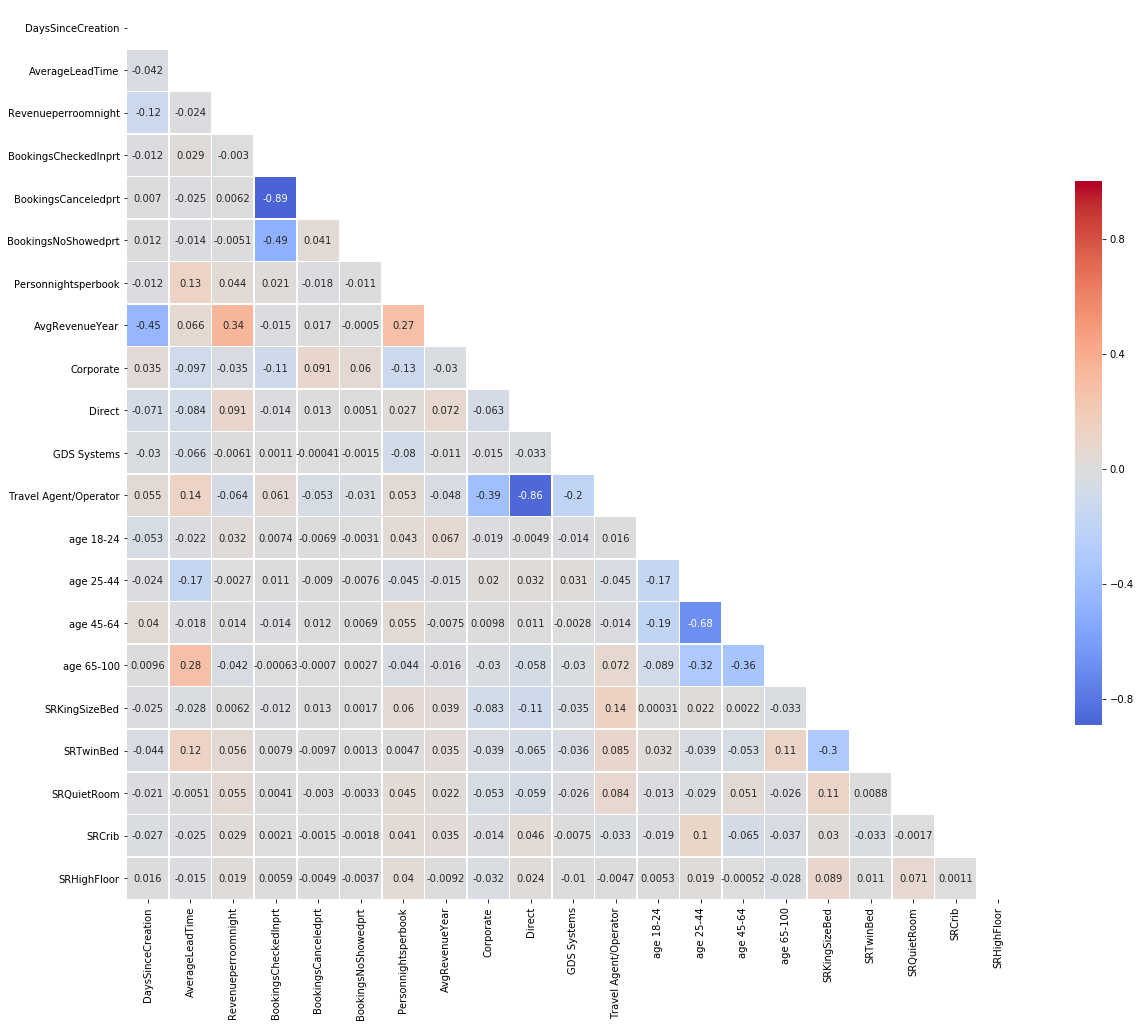

In [42]:
# Keep only the relevant columns on a new dataframe named X
X=data[['DaysSinceCreation', 'AverageLeadTime', # Original variables
          'Revenueperroomnight', 'BookingsCheckedInprt', 'BookingsCanceledprt', 'BookingsNoShowedprt', 'Personnightsperbook','AvgRevenueYear', # Created variables
          'Corporate', 'Direct', 'GDS Systems', 'Travel Agent/Operator', # Distribution Channel dummy variables
          'age 18-24', 'age 25-44', 'age 45-64', 'age 65-100', # Age bins dummy variables
          'SRKingSizeBed', 'SRTwinBed','SRQuietRoom','SRCrib','SRHighFloor' ]]

# Displaying the correlationg plot for dataframe X to detect high correlation between variables
corr_plot(X.corr())

In [43]:
# As we can see below the percentage of no show customers is very irrelevant percentage (0,0002)
# For this reason we're going to exclude the ones where noshow is above 0. Meaning we need to drop this variables
data['BookingsNoShowedprt'].value_counts()

0.000000    69436
0.500000        4
0.200000        4
0.111111        3
0.333333        2
0.100000        2
0.250000        2
0.083333        2
0.055556        2
0.047619        1
0.666667        1
0.024390        1
0.125000        1
0.022727        1
0.076923        1
0.010417        1
0.045455        1
0.071429        1
0.166667        1
0.142857        1
0.054054        1
0.062500        1
0.044776        1
0.018519        1
0.400000        1
0.036585        1
0.038462        1
0.052632        1
0.040000        1
Name: BookingsNoShowedprt, dtype: int64

In [44]:
# It would be interesting to examinate the customer with a very high no show rate to see
# if they share any characteristics but considering the low number of lines we cant conclude anything
data[data['BookingsNoShowedprt']>0.3]

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,BookingsCheckedInprt,BookingsCanceledprt,Corporate,Direct,GDS Systems,Travel Agent/Operator,age 18-24,age 25-44,age 45-64,age 65-100
338,2195,PRT,31.0,1322,6.0,53.0,14.00,0,1,1,...,0.500000,0.0,0,0,0,1,0,1,0,0
4302,51379,PRT,67.0,558,116.0,846.0,29.00,0,1,1,...,0.500000,0.0,0,0,0,1,0,0,0,1
4699,62974,PRT,46.0,466,3.0,269.0,7.00,0,1,2,...,0.666667,0.0,1,0,0,0,0,0,1,0
19359,928,ESP,57.0,1351,3.0,219.0,32.50,0,2,1,...,0.333333,0.0,0,1,0,0,0,0,1,0
26514,21355,AUT,61.0,1001,2.5,864.0,206.55,0,2,3,...,0.600000,0.0,1,0,0,0,0,0,1,0
31561,35504,DEU,48.0,778,8.0,89.0,10.00,0,1,1,...,0.500000,0.0,1,0,0,0,0,0,1,0
62720,24670,SWE,73.0,938,22.0,534.0,106.50,0,1,1,...,0.500000,0.0,0,1,0,0,0,0,0,1
65840,53694,ISR,52.0,540,17.0,279.0,52.00,0,1,2,...,0.666667,0.0,1,0,0,0,0,0,1,0


In [45]:
# See how many customers have ever canceled and if their percentage is high
OutCanceled = data.loc[data['BookingsCanceledprt']>0]
OutCanceled['BookingsCanceledprt'].value_counts()

0.333333    20
0.500000    17
0.111111     8
0.200000     8
0.250000     6
0.166667     4
0.100000     4
0.125000     3
0.055556     3
0.142857     2
0.153846     2
0.048780     2
0.071429     2
0.272727     2
0.159091     1
0.080000     1
0.194030     1
0.134146     1
0.173913     1
0.093750     1
0.230769     1
0.105263     1
0.047619     1
0.043478     1
0.428571     1
0.175676     1
0.045455     1
0.037037     1
0.222222     1
0.068182     1
0.212121     1
0.041667     1
0.052083     1
0.038462     1
0.102041     1
0.083333     1
0.300000     1
0.163043     1
Name: BookingsCanceledprt, dtype: int64

In [46]:
# See if despite the percentage being high the frequency is not
OutCanceled[['BookingsCanceledprt', 'BookingsCanceled']].sort_values(by='BookingsCanceled')

,BookingsCanceledprt,BookingsCanceled
0,0.333333,1
21529,0.333333,1
20903,0.111111,1
20271,0.200000,1
19790,0.333333,1
...,...,...
2102,0.212121,7
1280,0.134146,11
3719,0.194030,13
3839,0.175676,13


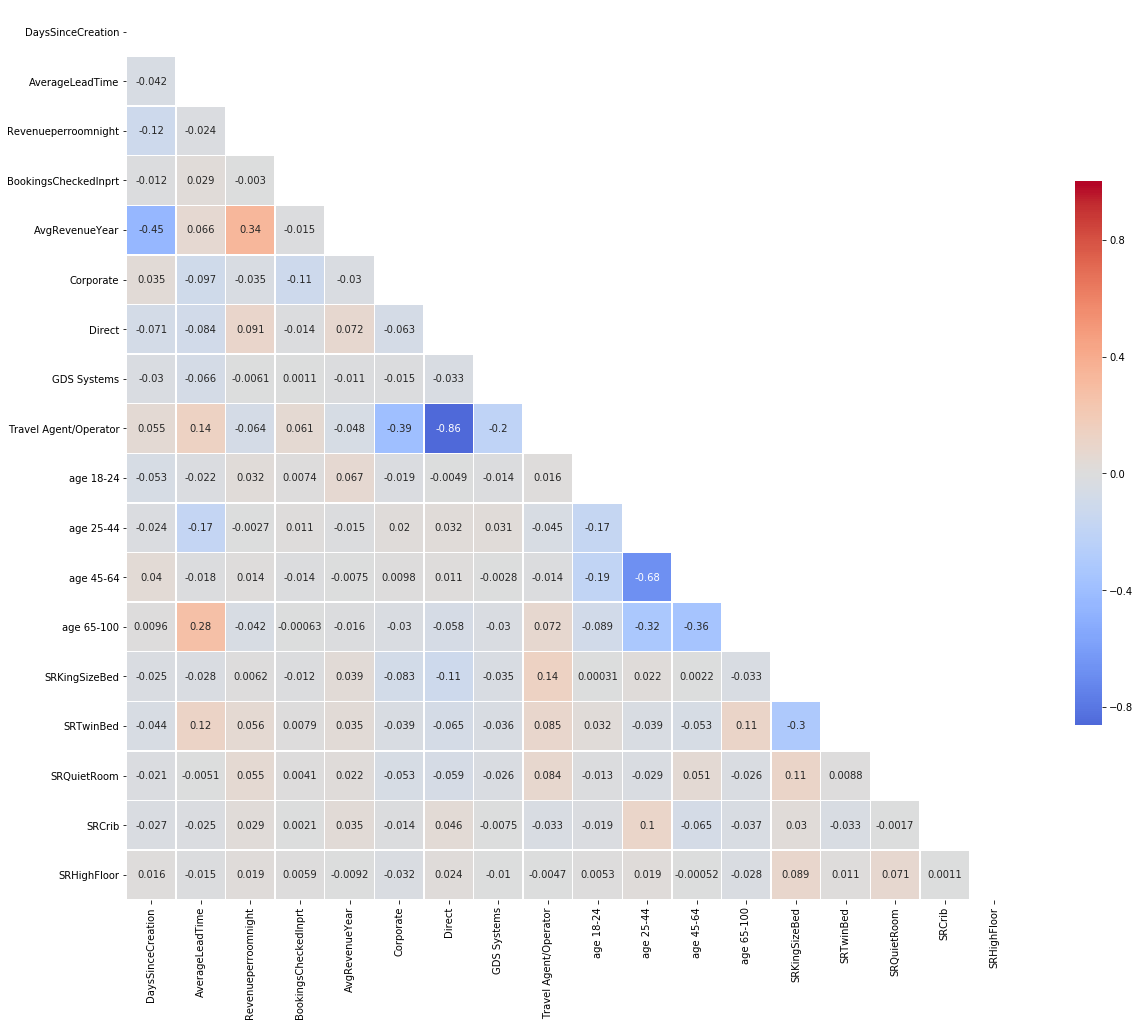

In [47]:
# Keeping the most relevant and not redundant variables
X=data[['DaysSinceCreation', 'AverageLeadTime', # Original variables
          'Revenueperroomnight', 'BookingsCheckedInprt','AvgRevenueYear', # Created variables
          'Corporate', 'Direct', 'GDS Systems', 'Travel Agent/Operator', # Distribution Channel dummy variables
          'age 18-24', 'age 25-44', 'age 45-64', 'age 65-100', # Age bins dummy variables
          'SRKingSizeBed', 'SRTwinBed','SRQuietRoom','SRCrib','SRHighFloor' ]]
# Plotting a correlation matrix of the input space
corr_plot(X.corr())

### Data Visualization 
As a descriptive analytics method

In [48]:
# Calculate the bookings by Distribution Channel
pivot_data = data[['BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'DistributionChannel']]

table = pd.pivot_table(pivot_data, index=['DistributionChannel'], aggfunc=np.sum)

del pivot_data
table.style.applymap(color_negative_red).format('{:,.0f}')

,BookingsCanceled,BookingsCheckedIn,BookingsNoShowed
DistributionChannel,,,
Corporate,150,"3,862",48
Direct,49,"9,579",5
GDS Systems,1,632,0
Travel Agent/Operator,19,"61,048",5


,BookingsCanceled,BookingsCheckedIn,BookingsNoShowed
region,,,
Africa,4,700,0
Americas,4,"7,817",1
Asia,1,"2,925",1
Europe,210,"62,892",56
Oceania,0,785,0


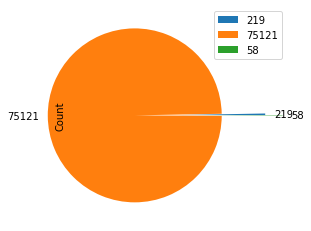

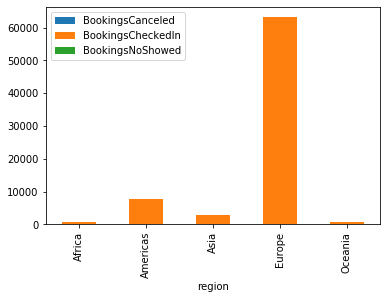

In [49]:
# Calculate the bookings by Region
pivot_data = data[['BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'region']]

table = pd.pivot_table(pivot_data, index=['region'], aggfunc=np.sum)

table_2 = pd.melt(pivot_data[['BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn']], 
                  value_vars =['BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn'],
                  var_name ='Booking status', value_name ='Count')
table_2.set_index('Booking status', inplace=True)
table_2 = pd.pivot_table(table_2, index=['Booking status'], aggfunc=np.sum)

del pivot_data

table_2.plot.pie(y='Count', figsize=(4,4), explode = (0, 0.5, 0.2), labels=table_2['Count'])
table.plot(kind='bar', stacked=True)
table.style.applymap(color_negative_red).format('{:,.0f}')

The previous charts shows that most of the customers are from Europe and the hotel has really low cancellation and non-showing records. 

,BookingsCanceled,BookingsCheckedIn,BookingsNoShowed
Age_bin_DV,,,
18-25,2,"3,253",2
25-30,5,"5,426",0
30-35,5,"7,062",1
35-40,6,"7,235",2
40-45,16,"8,249",4
45-50,62,"9,581",16
50-55,54,"9,934",17
55-60,42,"7,990",9
60-80,27,"15,071",6


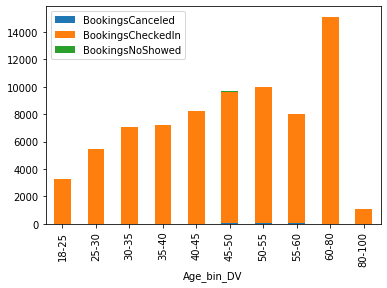

In [50]:
# Calculate the bookings by Region
pivot_data = data[['BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'Age_bin_DV']]

table = pd.pivot_table(pivot_data, index=['Age_bin_DV'], aggfunc=np.sum)

del pivot_data
table.plot(kind='bar', stacked=True)
table.style.applymap(color_negative_red).format('{:,.0f}')

The previous bar chart shows the cumulative behaviour of customers' bookings.

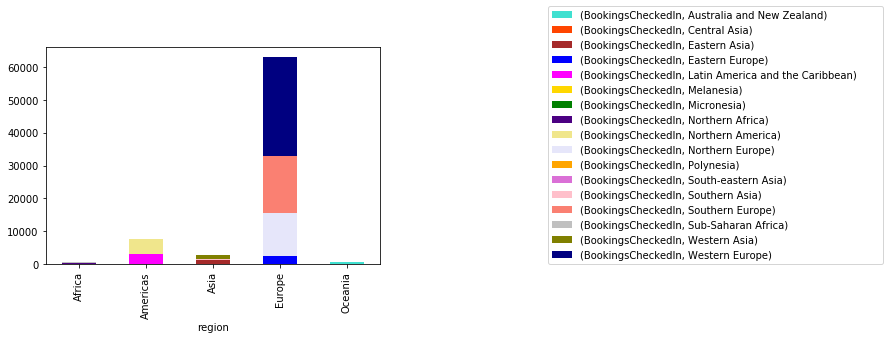

In [51]:

colors=['#40E0D0','#FF4500', '#A52A2A','#0000FF','#FF00FF','#FFD700','#008000','#4B0082','#F0E68C','#E6E6FA',
        '#FFA500','#DA70D6','#FFC0CB','#FA8072','#C0C0C0','#808000','#000080']

pivot_data = data[['BookingsCheckedIn', 'region', 'sub-region']]
table1 = pd.pivot_table(pivot_data, index=['region'], columns=['sub-region'], aggfunc=np.sum)
table1
table1.plot(kind='bar', stacked=True, legend=False, color=colors)
plt.legend(bbox_to_anchor=(1.5, 0, 1., .102), loc='lower right',
           ncol=1, mode="expand", borderaxespad=0.)

The previous stacked bar chart shows the bookings checked in considering the regions and sub-regions.

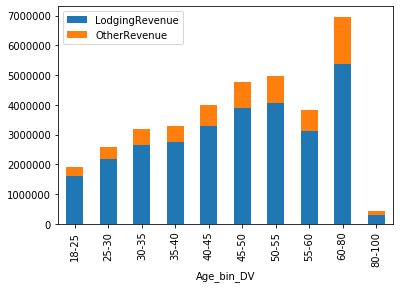

In [52]:
# Calculate the bookings by Region
pivot_data = data[['LodgingRevenue','OtherRevenue', 'Age_bin_DV']]

table = pd.pivot_table(pivot_data, index=['Age_bin_DV'], aggfunc=np.sum)

del pivot_data

table.plot(kind='bar', stacked=True)
table.style.applymap(color_negative_red).format('{:,.0f}')

# Drop the age_bin for data visualization
data.drop(['Age_bin_DV'], axis=1, inplace=True)

The previous bar chart shows the cumulative behaviour of customers' expenses, which logically follows the same pattern of bookings, since once they booked they are able to spend money. Here, it's shown that the Hotel obtain less 'Other revenues' from young customers.

### 4. Outliers detection and treatment

In [53]:
# Calculating the number of records before outliers treatment
Len_with_outliers = len(data)
print('Before excluding the outliers, the number of records are: ', len(data), '\n   ',
     'Which is the ', round((Len_with_outliers/original_lenght)*100,2) , '% of the initial records.'  )

Before excluding the outliers, the number of records are:  69478 
    Which is the  62.18 % of the initial records.


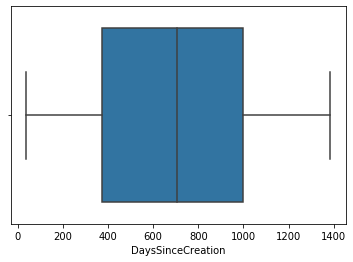

In [54]:
# DaysSinceCreation does not have outliers
sns.boxplot(x = data['DaysSinceCreation'], orient='h', whis=1.5) 

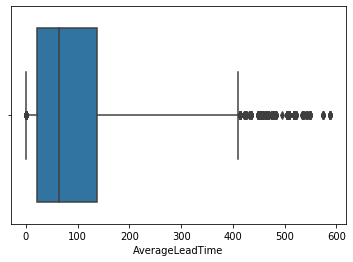

In [55]:
# AverageLeadTime
# note: see if this two points that are a little bit further impact the algorithms if so drop them
sns.boxplot(x = data['AverageLeadTime'], orient='h', whis=[1,99])

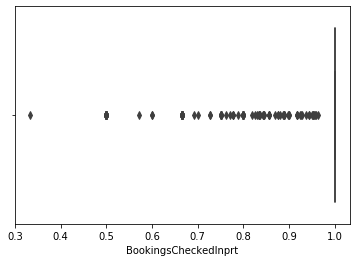

In [56]:
#BookingsCheckedInprt
sns.boxplot(x = data['BookingsCheckedInprt'], orient='h', whis=[1,99])

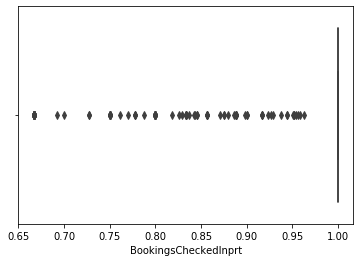

In [57]:
testedf = data.copy(deep=True)
testedf = testedf.loc[testedf['BookingsCheckedInprt']>0.6]
sns.boxplot(x = testedf['BookingsCheckedInprt'], orient='h', whis=1.5)

In [58]:
OutliersBC= data[data['BookingsCheckedInprt']<=0.6]
data=data[data['BookingsCheckedInprt']>0.6]

del testedf

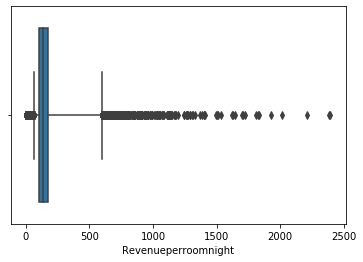

In [59]:
#Revenueperroomnight
sns.boxplot(x = data['Revenueperroomnight'], orient='h', whis=[1,99])

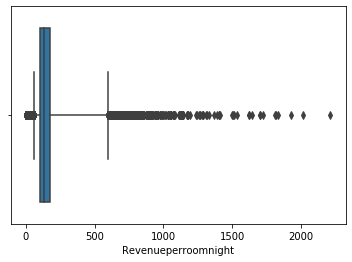

In [60]:
testedf = data.copy(deep=True)
testedf = testedf.loc[testedf['Revenueperroomnight']<=2380]
sns.boxplot(x = testedf['Revenueperroomnight'], orient='h', whis=[1,99])

In [61]:
OutliersRRN= data[data['Revenueperroomnight']>=2380]
data=data[data['Revenueperroomnight']<2380]

del testedf

In [62]:
OutliersRRN

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,BookingsCheckedInprt,BookingsCanceledprt,Corporate,Direct,GDS Systems,Travel Agent/Operator,age 18-24,age 25-44,age 45-64,age 65-100
32589,42504,DEU,52.0,669,65.0,9665.66,2265.0,0,0,1,...,1.0,0.0,0,0,0,1,0,0,1,0
53215,73434,GBR,56.0,390,39.0,9010.00,566.8,0,0,2,...,1.0,0.0,0,0,0,1,0,0,1,0


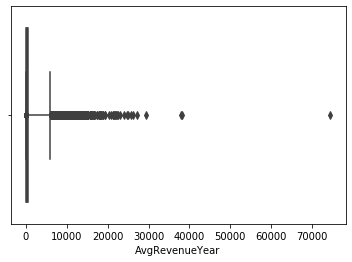

In [63]:
#AvgRevenueYear
sns.boxplot(x = data['AvgRevenueYear'], orient='h', whis=[1,99])

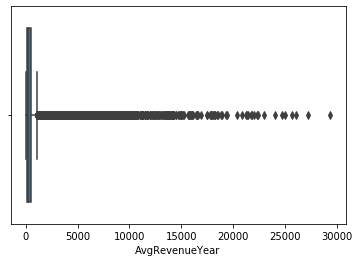

In [64]:
testedf = data.copy(deep=True)
testedf = testedf.loc[testedf['AvgRevenueYear']<30000]
sns.boxplot(x = testedf['AvgRevenueYear'], orient='h', whis=1.5)

In [65]:
OutliersARY= data[data['AvgRevenueYear']>=30000]
data=data[data['AvgRevenueYear']<30000]

del testedf

In [66]:
OutliersARY

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,BookingsCheckedInprt,BookingsCanceledprt,Corporate,Direct,GDS Systems,Travel Agent/Operator,age 18-24,age 25-44,age 45-64,age 65-100
17020,108913,FRA,21.0,59,124.0,4992.0,1199.1,0,0,1,...,1.0,0.0,0,1,0,0,1,0,0,0
57319,108813,BRA,63.0,60,9.0,5299.0,946.5,0,0,2,...,1.0,0.0,0,1,0,0,0,0,1,0
64526,105702,DNK,51.0,83,160.0,14044.8,2891.5,0,0,1,...,1.0,0.0,0,0,0,1,0,0,1,0


In [67]:
outliers = OutliersBC.copy(deep=True)
outliers = outliers.append(OutliersRRN)
outliers = outliers.append(OutliersARY)

del OutliersBC
del OutliersRRN
del OutliersARY


In [68]:
outliers.shape[0]

30

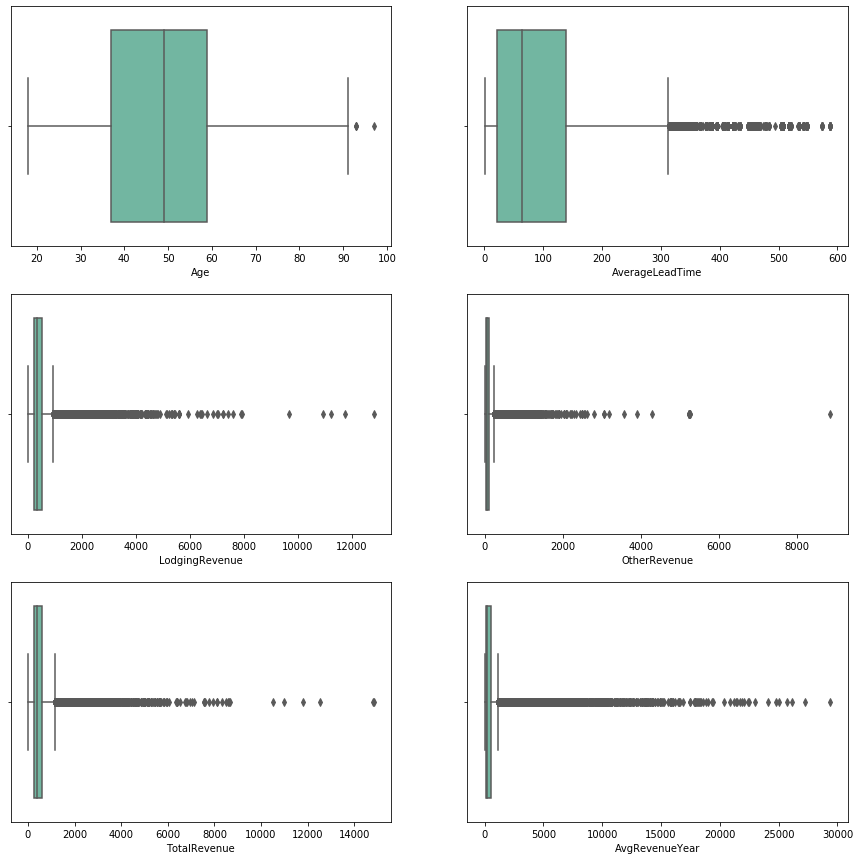

In [69]:
# Plotting all numerical variables boxplot after excluding outliers
boxp_var = data.select_dtypes(include=['float64']).columns

fig, ax = plt.subplots(3, 2, figsize=(15, 15))
for var, subplot in zip(data[boxp_var], ax.flatten()):
    sns.boxplot(data[var], ax=subplot, orient="h", palette="Set2")
    
del boxp_var

In [70]:
# Calculating the numbers of dropped outliers
Len_without_outliers = len(data)
print('After excluding the outliers, the number of records are: ', len(data), '\n   ',
     'Which is the ', round((Len_with_outliers/original_lenght)*100,2) , '% of the initial records.'  )
print('There were ', Len_with_outliers - Len_without_outliers, 'outliers detected and exclueded.')

After excluding the outliers, the number of records are:  69447 
    Which is the  62.18 % of the initial records.
There were  31 outliers detected and exclueded.


In [71]:
X=data[['DaysSinceCreation', 'AverageLeadTime', # Original variables
          'Revenueperroomnight', 'BookingsCheckedInprt','AvgRevenueYear', # Created variables
          'Corporate', 'Direct', 'GDS Systems', 'Travel Agent/Operator', # Distribution Channel dummy variables
          'age 18-24', 'age 25-44', 'age 45-64', 'age 65-100', # Age bins dummy variables
          'SRKingSizeBed', 'SRTwinBed','SRQuietRoom','SRCrib','SRHighFloor' ]]

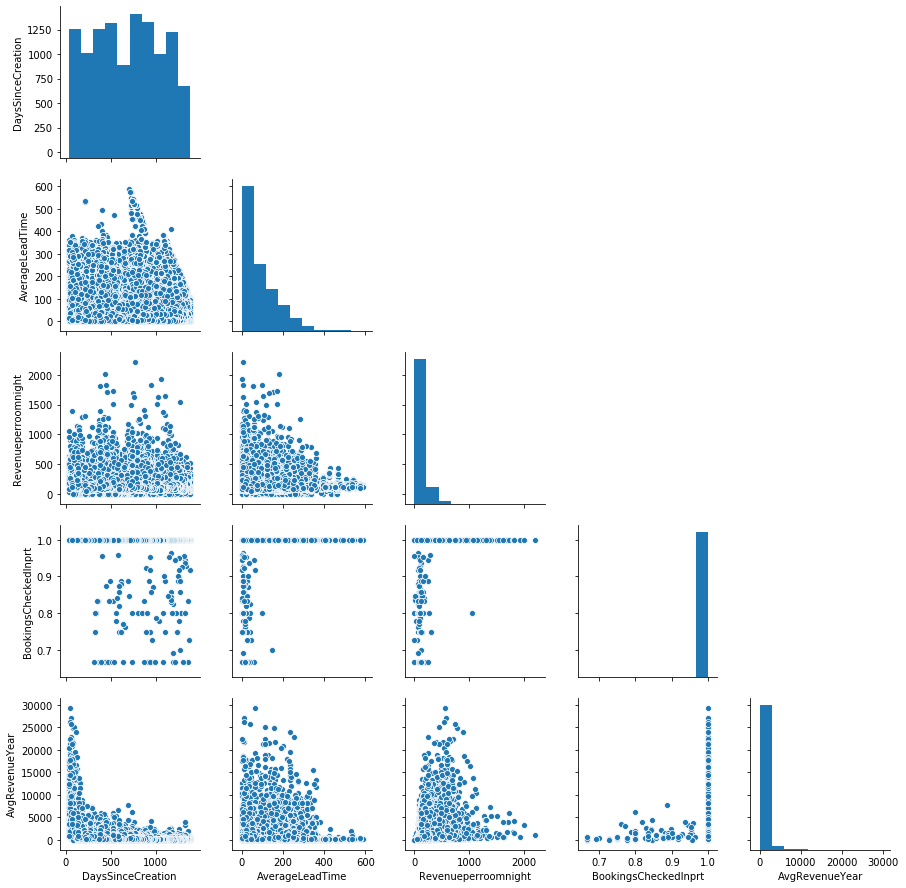

In [72]:
# Plotting pairplot to visualize better the correlations and distributions of some selected variables (Input Space)
g = sns.pairplot(X[['DaysSinceCreation', 'AverageLeadTime', 'Revenueperroomnight', 'BookingsCheckedInprt','AvgRevenueYear']])
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

In [73]:
# Showing the cleaned data stored in X
X.head(3).transpose()

,0,1,2
DaysSinceCreation,440.000000,1385.000000,1385.000000
AverageLeadTime,59.000000,2.200000,85.000000
Revenueperroomnight,93.575000,98.134231,78.200000
BookingsCheckedInprt,0.666667,1.000000,1.000000
AvgRevenueYear,310.498864,672.414332,61.825993
Corporate,1.000000,0.000000,0.000000
Direct,0.000000,1.000000,1.000000
GDS Systems,0.000000,0.000000,0.000000
Travel Agent/Operator,0.000000,0.000000,0.000000
age 18-24,0.000000,0.000000,0.000000


### 6. Principal Components Analysis (PCA) for reducing dimensionality

Determine the number of components needed to explain a reasonable percentage of the total variance using Principal Components Analysis (PCA).

In [74]:
# Get a copy of the dataframe before normalization
X_beforeNorm = X.copy(deep=True)

# Scaling the Data 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
X = pd.DataFrame(X_scaled, columns=X.columns)

# Fitting the PCA algorithm with our Data
pca = PCA().fit(X)

# Showing the percentage explained by each compomonent and 
# and the cumulative sum of this percentage on a table
pca_board = pd.DataFrame({"Explained var. (%)":np.round(pca.explained_variance_ratio_*100, decimals = 1),
                          "Cumulative var. (%)":np.round(np.cumsum(pca.explained_variance_ratio_*100), decimals = 2)})
pca_board.index.name = 'PC'
pca_board.index += 1 

print (pca_board)

    Explained var. (%)  Cumulative var. (%)
PC                                         
1                 11.7                11.74
2                  9.5                21.26
3                  9.4                30.69
4                  8.5                39.20
5                  6.7                45.87
6                  6.3                52.16
7                  5.9                58.11
8                  5.9                64.03
9                  5.6                69.66
10                 5.3                74.94
11                 5.1                80.02
12                 5.0                84.98
13                 4.8                89.81
14                 4.1                93.94
15                 3.4                97.37
16                 2.6                99.98
17                 0.0               100.00
18                 0.0               100.00


n_PC = 15: 15 selected principal components, getting 97.38% of the variance explained. 

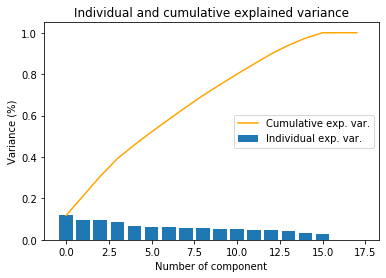

In [75]:
# Plotting the Cumulative Sum of the Explained Variance
plt.figure()

plt.plot(np.cumsum(pca.explained_variance_ratio_), 
         color = 'orange', 
         label = 'Cumulative exp. var.')

x_pos = np.arange(len(pca.explained_variance_ratio_))
plt.bar(x_pos,pca.explained_variance_ratio_,        
        label = 'Individual exp. var.')

plt.xlabel('Number of component')
plt.ylabel('Variance (%)') # for each component
plt.title('Individual and cumulative explained variance')
plt.legend(loc = 'center right', frameon = True)
plt.show()

Preprocessing the data (reducing dimmensions) to make it visualizable with PCA, based on the step 3 conclusions

In [76]:
# Reducing the dimensions of the data with PCA
n_PC = 15  # Define the numbers of components
pca_reduced = PCA(n_components = n_PC) 
pca_reduced.fit(X)
X_pca_reduced = pca_reduced.transform(X) 
X_pca_reduced = pd.DataFrame(X_pca_reduced) 
X_pca_reduced.columns = ['PC' + str(x) for x in range(1,n_PC + 1)] 
  
X_pca_reduced.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,5.695247,2.900905,-5.051437,-1.184962,-0.046896,25.196890,-0.014369,15.679313,0.121905,8.914505,5.403193,23.680719,-3.276151,0.489802,3.039628
1,3.090267,-1.300068,-1.436701,0.067333,1.503097,-0.966299,0.451755,-0.127187,-0.475477,-0.693515,-0.394472,0.853432,0.314342,0.103883,-1.224062
2,2.147142,0.418361,-1.303596,-2.919700,2.386491,-0.929687,0.461336,-0.160852,-0.241386,-0.103293,-0.761567,0.504029,0.579684,-0.894876,0.341751


Text(0, 0.5, 'Component 2')

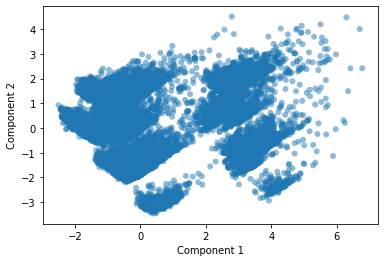

In [77]:
# Plot a scatter plot of the two Principal Components
plt.scatter(X_pca_reduced.iloc[:, 0], X_pca_reduced.iloc[:, 1], edgecolor='none', alpha=0.5, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

### 7. Clustering with K-means

Determine the number of clusters "K" with elbow method and silhouette plot. 
Choosing the breakpoint with the lowest number of clusters and the lowest variance of Sum of Squared Errors (SSE). 
Using silhouette plot to display a measure of how close each point in one cluster is to points in the neighboring clusters.

Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster. 
[Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html]

#### Warning!!! The following cell takes a time to process. Uncomment if it's necessary

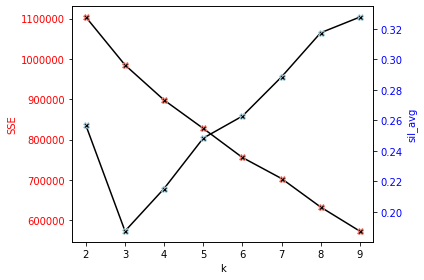

In [78]:
# Showing scree plot to determine the correct number of clusters
sse=sse_vals(X_pca_reduced, 10)
sil=sill_scores(X_pca_reduced, 10)

fig, ax1 = plt.subplots()

ax1.set_xlabel('k')
ax1.set_ylabel('SSE', color='red')

ax1.plot(sil['k'], sse['Inertia'],
             linewidth=1.5,
             linestyle="-",
             marker = "X",
             markeredgecolor="salmon",
             color = "black")
ax1.tick_params(axis='y', labelcolor="red")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


ax2.set_ylabel('sil_avg', color='blue')# we already handled the x-label with ax1
ax2.plot(sil['k'], sil['sil_score'],
             linewidth=1.5,
             linestyle="-",
             marker = "X",
             markeredgecolor="lightblue",
             color = "black")
ax2.tick_params(axis='y', labelcolor="blue")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

The clusters with small number of individuals dont are our best customers either, reduce to k=6, to see if produces a more balanced result.

In [79]:
# We choose n_clusters=6, so lets calculate the kmeans for this amount of clusters
n_clusters = 6

kmeans = KMeans(n_clusters=n_clusters, random_state=123, n_init=10, max_iter=300).fit(X_pca_reduced)  
my_clusters = kmeans.cluster_centers_ 
my_clusters = pd.DataFrame(kmeans.cluster_centers_)
y_kmeans = kmeans.predict(X_pca_reduced)

In [80]:
# Re-calculating the average silhouette score
silhouette_avg_lob = silhouette_score(X_pca_reduced, kmeans.labels_)
print("For n_clusters =", n_clusters,",the average silhouette score is :", round(silhouette_avg_lob, 2))

For n_clusters = 6 ,the average silhouette score is : 0.26


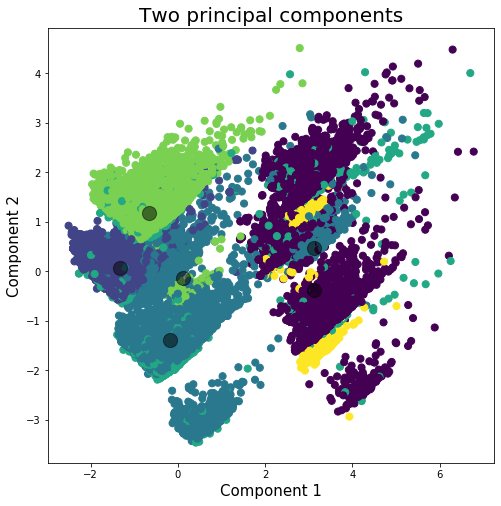

In [81]:
# Plot results two principal components
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('Two principal components', fontsize = 20)
ax.scatter(X_pca_reduced.iloc[:, 0], X_pca_reduced.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [82]:
# Grouping the dataframe by clusters labels to determine the number of customers per cluster
X_beforeNorm.groupby(y_kmeans).size().apply("{:,.0f}".format)

0     9,544
1     8,770
2    23,683
3     2,878
4    24,041
5       531
dtype: object

In [83]:
clusters_minmax = pd.DataFrame(X_minmax.groupby(y_kmeans).mean())

NameError: name 'X_minmax' is not defined

In [ ]:
columns=['Creation', 'LeadT', 'RevpRoomN', 'CheckIn', 'RevYear', 'Corp', 'Dir','GDS','TA/O', 'age1','age2', 'age3', 'age4','SR1', 'SR2', 'SR3', 'SR4', 'SR5']
clusters_minmax.columns=columns

In [ ]:
# Create a dataframe with the weights per component
wheightsDF = pd.DataFrame(pca.components_,columns=X.columns)
wheightsDF

In [ ]:
# Study the weights of component 15
comp = abs(wheightsDF.iloc[14])  
comp = comp.sort_values(ascending=False)
comp

In [ ]:
# Plotting the loading of each variable to each cluster
top_features=comp[:18].index
clustersMeanDF = pd.DataFrame(X_beforeNorm[top_features].groupby(y_kmeans).mean())
clustersMeanDF.transpose()

### Visualizing the loadings of each variable on each cluster
With the previous matrix and the following visualizationsm it's possible to determine the customer profile to each cluster

In [ ]:
clusters_minmax = pd.DataFrame(X_minmax.groupby(y_kmeans).mean())
clusters_minmax.head()

In [ ]:
data_avg=pd.DataFrame(X_minmax.mean())
data_avg=data_avg.transpose()
data_avg.head()

In [ ]:
columns=['Creation', 'LeadT', 'RevpRoomN', 'CheckIn', 'RevYear', 'Corp', 'Dir','GDS','TA/O', 'age1','age2', 'age3', 'age4','SR1', 'SR2', 'SR3', 'SR4', 'SR5']
clusters_minmax.columns=columns

In [ ]:
plot_cluster(0)

In [ ]:
plot_cluster(1)

In [ ]:
plot_cluster(2)

In [ ]:
plot_cluster(3)

In [ ]:
plot_cluster(4)

In [ ]:
plot_cluster(5)

#### Some insights about the customer segmentation:

**Cluster 1**: Younger people mostly booking by Travel Agents or Operators and requesting King Sized beds 

* Almost half of the people in this cluster request King Size Beds, possibly meaning that has mostly couples

* Preferences also in Hight floors 

* Majority of bookings done by Travel Agents or Operators 

* Average spending’s in hotel 

* Younger people (age 18-24, age 25-44) 

* Smaller average lead time than population’s average 

**Cluster 2**: Adults coming by Direct Channel spending more than other clusters in the hotel 

* Preferences in King Sized beds, Hight floors 

* Biggest revenue generated 

* Almost all bookings done by Direct Channel 

* Adults (age 25-44 and age 45-64) 

* Smaller average lead time than population’s average 

* Most recent clients  

**Cluster 3**: Adults coming by Direct Channel with family/friends doing high spending’s in hotel 

* Almost all the people in this cluster request Twin Beds, mostly friends/family 

* Almost all bookings done by Direct Channel 

* Preferences in Quiet Rooms, Hight floors and Cribs 

* Second highest revenue generated 

* Adults (age 25-44 and age 45-64) 

**Cluster 4**: Elderlies doing bookings in advanced by OTA, requesting specific beds 

* Almost all bookings done through Travel Agents or Operators 

* Elderly (age > 64) 

* Customer who do the booking most in advance 

* A significant portion of the clients request either Twin or King size beds 
 
**Cluster 5**: Adults doing booking by OTA requesting King Size Beds 

* Almost half of the customers in this Cluster request King Size Beds, possibly meaning that has mostly couples. 

* Majority of bookings done by Travel Agents or Operators 

* Almost only made up of adults (age 45-64) 

* Customer who have been with the hotel for a long time 

**Cluster 6**: Adults doing booking by Corporate spending the least on the hotel 

* Least profitable cluster 

* Only cluster whit bookings done through corporate 

* Adults (age 25-64) 

* Bookings done with the smallest days from arrival 

* Clients who have been with the hotel the longest 

* In the majority, don’t have special request 